# Sensor Fault Detection - Data Analysis

This notebook shows how to prepare data for machine learning.

## What We'll Do

1. **Data Understanding** - check what data we have
2. **Data Cleaning** - fix missing values and duplicates
3. **Data Visualization** - make graphs to see patterns
4. **Data Encoding** - prepare data for ML models

## Tips

- Read the markdown cells before running code
- Run cells in order
- Try changing values to see what happens
- Ask for help if you're stuck

## How to Use

1. Read the markdown cells (like this one)
2. Run code cells with Shift + Enter
3. Look at the output to understand what's happening
4. Take your time to understand each step

Let's start!


In [59]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# set display options
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style("whitegrid")

print("Libraries imported!")


Libraries imported!


In [60]:
# load the dataset
df = pd.read_csv('data/sensor-fault-detection.csv', sep=';')

print(f"Loaded: {df.shape[0]} rows, {df.shape[1]} columns")
df.head()


Loaded: 62629 rows, 3 columns


,Timestamp,SensorId,Value
0,2017-03-01T23:20:00+03:00,1,18.479807
1,2017-03-02T04:00:00+03:00,1,19.539112
2,2017-03-23T06:25:00+03:00,1,19.250198
3,2017-03-23T19:35:00+03:00,1,18.961285
4,2017-04-04T15:10:00+03:00,1,25.321623


## 1. Data Understanding

Let's check what data we have.


In [61]:
# basic info about the dataset
print("Dataset Info:")
df.info()
print("\nMissing values:")
print(df.isnull().sum())
print("\nStatistical summary:")
df.describe()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62629 entries, 0 to 62628
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  62629 non-null  object 
 1   SensorId   62629 non-null  int64  
 2   Value      62629 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.4+ MB

Missing values:
Timestamp    0
SensorId     0
Value        0
dtype: int64

Statistical summary:


,SensorId,Value
count,62629.0,62629.000000
mean,1.0,24.203861
std,0.0,5.411599
min,1.0,6.886155
25%,1.0,21.369419
50%,1.0,24.550188
75%,1.0,27.443794
max,1.0,149.601822


## 2. Data Cleaning

Now let's clean the data.

**What is data cleaning?**
- Fix missing values
- Remove duplicates
- Convert data types
- Check for outliers


In [62]:
# check for missing values
print("Checking for missing values...")
print(f"Missing values:\n{df.isnull().sum()}")
print(f"Total missing: {df.isnull().sum().sum()}")

# drop rows with missing values if any
if df.isnull().sum().sum() > 0:
    print(f"\nDropping {df.isnull().sum().sum()} rows with missing values...")
    df = df.dropna()
    print(f"Shape after dropping: {df.shape}")
else:
    print("\nNo missing values found!")

# convert timestamp to datetime
print("\nConverting Timestamp to datetime...")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
print("Done!")

# check for duplicates
print("\nChecking for duplicates...")
duplicate_count = df.duplicated().sum()
print(f"Found {duplicate_count} duplicate rows")

# remove duplicates
if duplicate_count > 0:
    print(f"Removing {duplicate_count} duplicates...")
    df_clean = df.drop_duplicates()
    print(f"Shape after removing: {df_clean.shape}")
else:
    print("No duplicates found!")
    df_clean = df.copy()

# check for outliers using IQR method
print("\nChecking for outliers...")
Q1 = df_clean['Value'].quantile(0.25)
Q3 = df_clean['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_clean[(df_clean['Value'] < lower_bound) | (df_clean['Value'] > upper_bound)]
print(f"Found {len(outliers)} outliers")
print(f"Outlier range: < {lower_bound:.2f} or > {upper_bound:.2f}")

# summary
print("\n" + "="*50)
print("Cleaning Summary:")
print("="*50)
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_clean.shape}")
print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}")
print(f"Columns: {df_clean.columns.tolist()}")
print("="*50)

# save cleaned data
df_clean.to_csv('data/sensor_fault_detection_cleaned.csv', index=False)
print("\nCleaned data saved!")
df_clean.head()


Checking for missing values...
Missing values:
Timestamp    0
SensorId     0
Value        0
dtype: int64
Total missing: 0

No missing values found!

Converting Timestamp to datetime...
Done!

Checking for duplicates...
Found 0 duplicate rows
No duplicates found!

Checking for outliers...
Found 1791 outliers
Outlier range: < 12.26 or > 36.56

Cleaning Summary:
Original shape: (62629, 3)
Cleaned shape: (62629, 3)
Rows removed: 0
Columns: ['Timestamp', 'SensorId', 'Value']

Cleaned data saved!


,Timestamp,SensorId,Value
0,2017-03-01 23:20:00+03:00,1,18.479807
1,2017-03-02 04:00:00+03:00,1,19.539112
2,2017-03-23 06:25:00+03:00,1,19.250198
3,2017-03-23 19:35:00+03:00,1,18.961285
4,2017-04-04 15:10:00+03:00,1,25.321623


## 3. Data Visualization

Let's make some graphs to see patterns in the data.


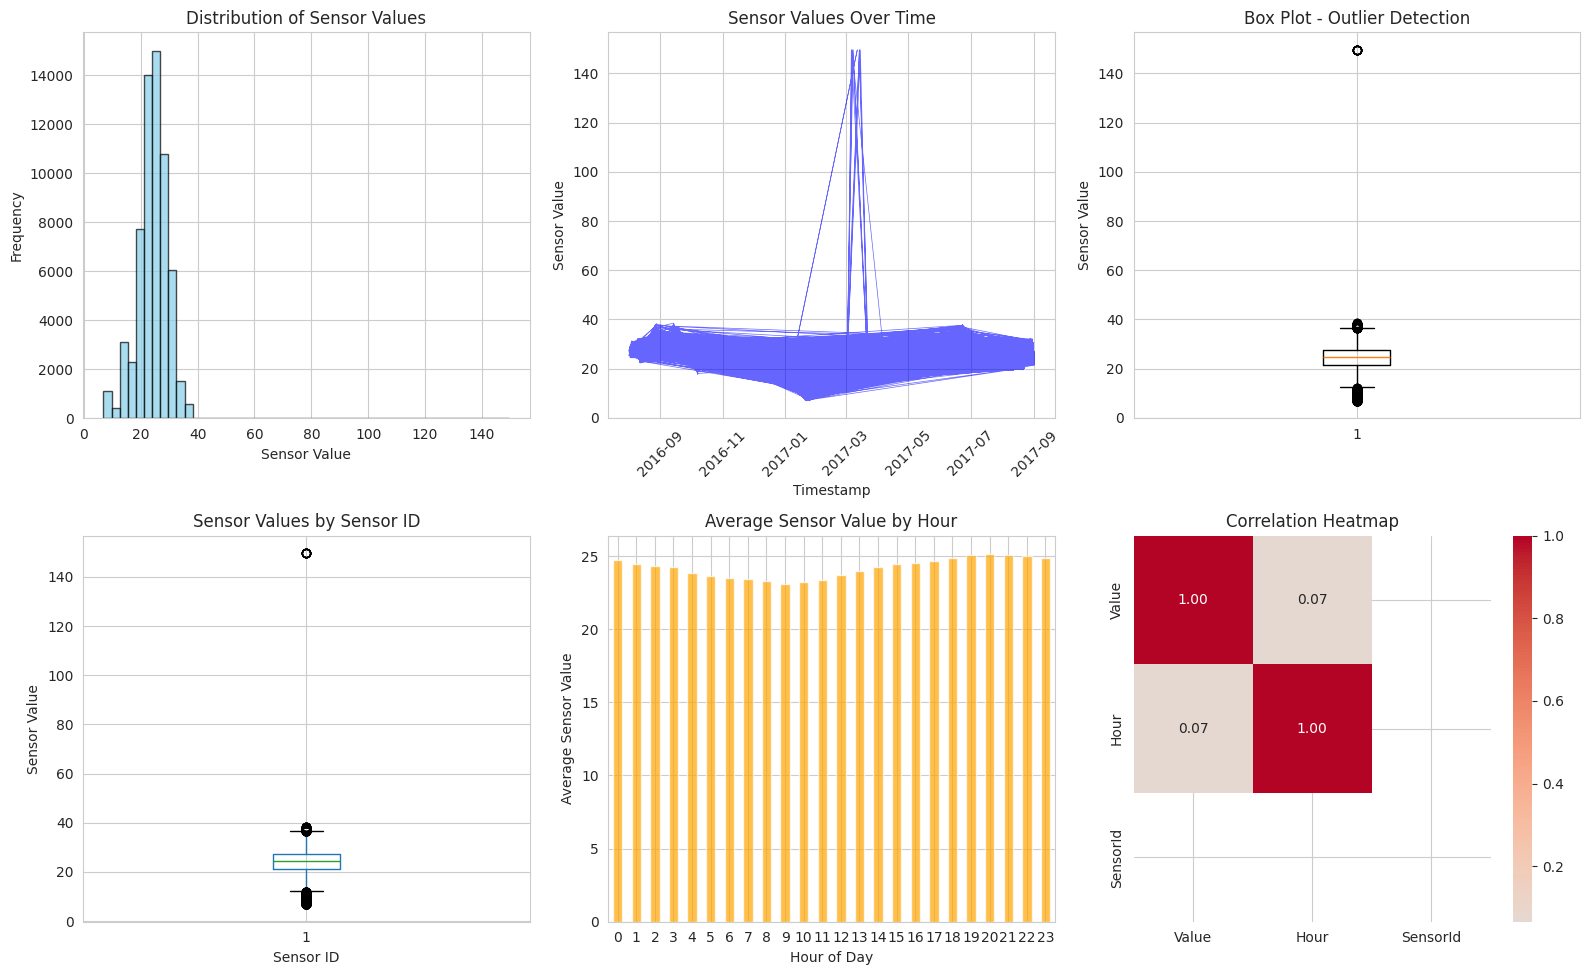

In [63]:
# Graph 1: Distribution of sensor values
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.hist(df_clean['Value'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Sensor Value')
plt.ylabel('Frequency')
plt.title('Distribution of Sensor Values')

# Graph 2: Time series plot
plt.subplot(2, 3, 2)
plt.plot(df_clean['Timestamp'], df_clean['Value'], alpha=0.6, linewidth=0.5, color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Sensor Value')
plt.title('Sensor Values Over Time')
plt.xticks(rotation=45)

# Graph 3: Box plot to see outliers
plt.subplot(2, 3, 3)
plt.boxplot(df_clean['Value'], vert=True)
plt.ylabel('Sensor Value')
plt.title('Box Plot - Outlier Detection')

# Graph 4: Sensor values by SensorId (if we have multiple sensors)
plt.subplot(2, 3, 4)
df_clean.boxplot(column='Value', by='SensorId', ax=plt.gca())
plt.xlabel('Sensor ID')
plt.ylabel('Sensor Value')
plt.title('Sensor Values by Sensor ID')
plt.suptitle('')  # Remove default title

# Graph 5: Value distribution by hour of day
df_clean['Hour'] = df_clean['Timestamp'].dt.hour
plt.subplot(2, 3, 5)
df_clean.groupby('Hour')['Value'].mean().plot(kind='bar', color='orange', alpha=0.7)
plt.xlabel('Hour of Day')
plt.ylabel('Average Sensor Value')
plt.title('Average Sensor Value by Hour')
plt.xticks(rotation=0)

# Graph 6: Correlation heatmap (if we have multiple features)
plt.subplot(2, 3, 6)
# Create a simple correlation with hour
corr_data = df_clean[['Value', 'Hour', 'SensorId']].corr()
sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()


## 4. Data Encoding

Let's prepare the data for ML models by encoding and scaling.


In [64]:
# make a copy of cleaned data
df_encoded = df_clean.copy()

# extract time features from timestamp
df_encoded['Year'] = df_encoded['Timestamp'].dt.year
df_encoded['Month'] = df_encoded['Timestamp'].dt.month
df_encoded['Day'] = df_encoded['Timestamp'].dt.day
df_encoded['Hour'] = df_encoded['Timestamp'].dt.hour
df_encoded['DayOfWeek'] = df_encoded['Timestamp'].dt.dayofweek

# scale the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scale all numerical columns
features_to_scale = ['Value', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek']
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

# drop timestamp since we extracted time features
df_encoded_ml = df_encoded.drop('Timestamp', axis=1)

# save the encoded data
df_encoded_ml.to_csv('data/sensor_fault_detection_cleaned_encoded.csv', index=False)

print("Data encoded and saved!")
print(f"Shape: {df_encoded_ml.shape}")
print(f"Columns: {df_encoded_ml.columns.tolist()}")
print("\nReady for ML training!")
df_encoded_ml.head()


Data encoded and saved!
Shape: (62629, 7)
Columns: ['SensorId', 'Value', 'Hour', 'Year', 'Month', 'Day', 'DayOfWeek']

Ready for ML training!


,SensorId,Value,Hour,Year,Month,Day,DayOfWeek
0,1,-1.057746,1.660271,0.364752,-0.964508,-1.770517,-0.505427
1,1,-0.861998,-1.085311,0.364752,-0.964508,-1.655805,-0.000741
2,1,-0.915386,-0.796302,0.364752,-0.964508,0.753151,-0.000741
3,1,-0.968774,1.082254,0.364752,-0.964508,0.753151,-0.000741
4,1,0.206551,0.504237,0.364752,-0.617136,-1.426381,-1.010113
